In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# DATA MODELING

### 1: Đọc file "historical_quotes.json" và  file "trading_statistics.json" 

In [3]:
df_his=pd.read_json('dataset/historical_quotes.json',keep_default_dates=False)
df_his['date']=pd.to_datetime(df_his['date'],format='%d/%m/%Y')
df_his.head(30)

,date,fluctuation,open price,high price,low price,close price,AVG price,adjusted close price,volume
0,2022-11-29,+1.00/+9.52%,11.50,11.50,10.30,11.50,11.23,11.50,1589500
1,2022-11-28,+0.90/+9.38%,8.70,10.50,8.70,10.50,10.42,10.50,103700
2,2022-11-25,+0.80/+9.09%,9.40,9.60,9.40,9.60,9.60,9.60,289900
3,2022-11-24,+0.80/+10.00%,8.00,8.80,7.40,8.80,8.17,8.80,751400
4,2022-11-23,-0.40/-4.76%,8.40,8.80,8.00,8.00,8.30,8.00,642500
5,2022-11-22,+0.70/+9.09%,8.20,8.40,8.00,8.40,8.35,8.40,1137500
6,2022-11-21,+0.70/+10.00%,7.60,7.70,7.30,7.70,7.65,7.70,410900
7,2022-11-18,+0.60/+9.38%,6.70,7.00,6.00,7.00,6.61,7.00,1394200
8,2022-11-17,+0.50/+8.47%,6.20,6.40,6.20,6.40,6.36,6.40,880900
9,2022-11-16,+0.50/+9.26%,4.90,5.90,4.90,5.90,5.19,5.90,956200


In [4]:
df_trading=pd.read_json('dataset/trading_statistics.json',keep_default_dates=False)
df_trading['date']=pd.to_datetime(df_trading['date'],format='%d/%m/%Y')
df_trading

,date,close_price,trading_buy_count,trading_buy_volume,trading_sell_count,trading_sell_volume,buy_sell_difference,auction_volume,auction_value (1000VND)
0,2022-11-29,11.50,846,1887274,566,1591113,296161,1589500,17847256
1,2022-11-28,10.50,200,642101,93,104014,538087,103700,1080750
2,2022-11-25,9.60,280,1031136,175,290597,740539,289900,2781999
3,2022-11-24,8.80,434,1520313,361,751935,768378,751400,6141733
4,2022-11-23,8.00,314,891007,360,803363,87644,642500,5334003
...,...,...,...,...,...,...,...,...,...
3258,2009-11-02,9.50,6,10900,22,79020,-68120,10300,97560
3259,2009-10-30,9.70,23,29410,50,93880,-64470,29410,300879
3260,2009-10-29,10.50,14,30700,15,46360,-15660,6100,65250
3261,2009-10-27,9.40,35,78110,27,48000,30110,26700,242250


Kết hợp hai dữ liệu lại với nhau

In [5]:
left = df_his
right = df_trading
result = pd.merge(left, right)
result.drop('close_price', inplace=True, axis=1)
result.drop('volume', inplace=True, axis=1)
result

,date,fluctuation,open price,high price,low price,close price,AVG price,adjusted close price,trading_buy_count,trading_buy_volume,trading_sell_count,trading_sell_volume,buy_sell_difference,auction_volume,auction_value (1000VND)
0,2022-11-29,+1.00/+9.52%,11.50,11.50,10.30,11.50,11.23,11.50,846,1887274,566,1591113,296161,1589500,17847256
1,2022-11-28,+0.90/+9.38%,8.70,10.50,8.70,10.50,10.42,10.50,200,642101,93,104014,538087,103700,1080750
2,2022-11-25,+0.80/+9.09%,9.40,9.60,9.40,9.60,9.60,9.60,280,1031136,175,290597,740539,289900,2781999
3,2022-11-24,+0.80/+10.00%,8.00,8.80,7.40,8.80,8.17,8.80,434,1520313,361,751935,768378,751400,6141733
4,2022-11-23,-0.40/-4.76%,8.40,8.80,8.00,8.00,8.30,8.00,314,891007,360,803363,87644,642500,5334003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,2009-11-02,-0.20/-2.06%,9.50,9.50,9.20,9.50,9.47,4.15,6,10900,22,79020,-68120,10300,97560
3259,2009-10-30,-0.80/-7.62%,11.00,11.70,9.70,9.70,10.23,4.24,23,29410,50,93880,-64470,29410,300879
3260,2009-10-29,+1.10/+11.70%,11.00,11.00,10.50,10.50,10.70,4.59,14,30700,15,46360,-15660,6100,65250
3261,2009-10-27,+0.40/+4.44%,9.00,9.60,8.70,9.40,9.07,4.11,35,78110,27,48000,30110,26700,242250


### 2: Phân tích dữ liệu và mô hình hóa

Câu hỏi: Dự đoán lượng cổ phiếu bán ra theo các cột open price, high price, low price, close price

Coefficients:  [ 21309.82620941  17781.74104673 -60990.82927306  20777.08525488]
Mean squared error: 88564868051.57
Coefficient of determination: -0.00


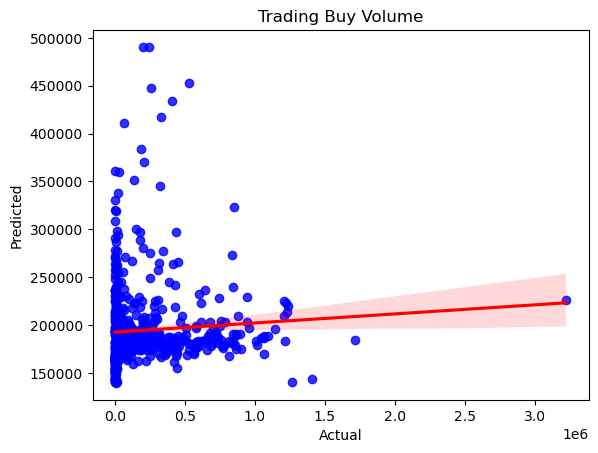

In [7]:
# predict trading_buy_volume according to open price, high price, low price, close price with linear regression
X = result[['open price','high price', 'low price', 'close price']]
y = result['trading_buy_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print('Coefficients: ', model.coef_)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# visualize
sns.regplot(x=y_test, y=y_pred, data=result, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Trading Buy Volume')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()



Mean squared error: 134555469709.35
Coefficient of determination: -0.52


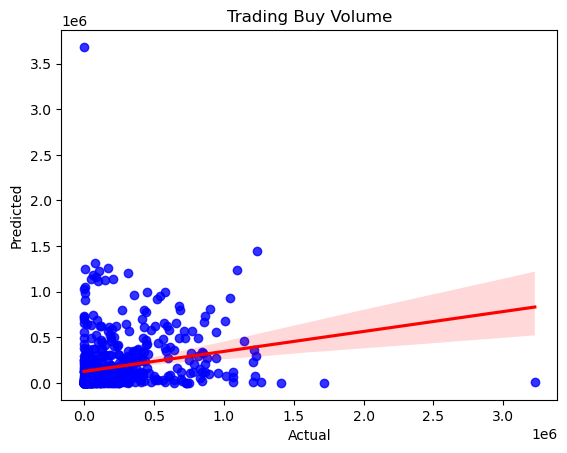

In [8]:
# classify fluctuation with Decision Tree
from sklearn.tree import DecisionTreeClassifier

# create model
model = DecisionTreeClassifier()

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# visualize
sns.regplot(x=y_test, y=y_pred, data=result, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Trading Buy Volume')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()